In [7]:
import pandas as pd 
import numpy as np
import folium
import math
import time
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot
dataframe = pd.read_csv('/home/ruben/tmp/HH_intro_git_ds/precios_casas_sinduplicados.csv')
dataframe_old = pd.read_csv('/home/ruben/tmp/HH_intro_git_ds/Melbourne_housing_FULL.csv')
import scipy.stats as ss
import matplotlib.pyplot as plot
import seaborn as sb
from seaborn import kdeplot
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings

def quartile_skew(x):
  q = x.quantile([.25, .50, .75]) 
  return ((q[0.75] - q[0.5]) - (q[0.5] - q[0.25])) / (q[0.75] - q[0.25])
dataframe['Price']=dataframe_old['Price']

duplicateRowsDF=pd.DataFrame()
duplicateRowsDF = dataframe[dataframe.duplicated(['Suburb', 'Address','Postcode','CouncilArea',],keep=False)]
duplicateRowsDF=duplicateRowsDF.drop_duplicates(subset=['Address','Price','Date'])
duplicateRowsDF=duplicateRowsDF.dropna(subset=['Price'])
dataframe=dataframe.drop_duplicates(subset=['Address','Suburb'], keep=False, ignore_index=True)
dataframe.append(duplicateRowsDF)
dataframe=dataframe.dropna(subset=['Price'])
dataframe=dataframe.reset_index(drop=True)



#dataframe['Price']=dataframe['Price'].replace(0, 1)
print(dataframe)
print(dataframe_old.dtypes)
dataframe['Rooms']=np.sqrt(dataframe['Rooms'])
dataframe['Distance']=np.sqrt(dataframe['Distance'])


dataframe['Longtitude']=dataframe['Longtitude'].replace(0, 1)
dataframe['Distance']=dataframe['Distance'].replace(0, 1)
dataframe['Landsize']=dataframe['Landsize'].replace(0, 1)
dataframe=dataframe[dataframe['Landsize']>0]
dataframe['Longtitude']=dataframe['Longtitude'].replace(0, 1)

dataframe_filtered=pd.DataFrame(dataframe[dataframe["Distance"].notnull()])
print(dataframe_filtered)
dataframe_filtered=dataframe_filtered[dataframe_filtered["Landsize"].notnull()]
dataframe_filtered=dataframe_filtered[dataframe_filtered["Price"].notnull()]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Price']!=np.nan]
dataframe_filtered['Price']=np.sqrt(np.log10(dataframe_filtered['Price'].astype(np.int64)))    
dataframe_filtered=dataframe_filtered[dataframe_filtered['Distance']<40]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Rooms']<10]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Bathroom']<5]
dataframe_filtered['Landsize']=np.log(dataframe_filtered['Landsize'])
dataframe_filtered['Longtitude']=np.log(dataframe_filtered['Longtitude'])
dataframe_filtered['Propertycount']=np.log(dataframe_filtered['Propertycount'])
dataframe_filtered['Propertycount']=np.log(dataframe_filtered['Propertycount'])
dataframe_filtered=dataframe_filtered[dataframe_filtered['Distance']!=np.nan]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Landsize']!=np.nan]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Longtitude']!=np.nan]
dataframe_filtered['BathAndRooms']=(dataframe_filtered["Rooms"]+dataframe_filtered["Bathroom"])/np.sqrt(dataframe_filtered['Distance'])
dataframe_filtered.describe()


           Suburb           Address  Rooms Type      Price Method  \
0      Abbotsford      85 Turner St      2    h  1480000.0      S   
1      Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2      Abbotsford      5 Charles St      3    h  1465000.0     SP   
3      Abbotsford  40 Federation La      3    h   850000.0     PI   
4      Abbotsford       55a Park St      4    h  1600000.0     VB   
...           ...               ...    ...  ...        ...    ...   
26543  Yarraville       13 Burns St      4    h  1480000.0     PI   
26544  Yarraville     29A Murray St      2    h   888000.0     SP   
26545  Yarraville    147A Severn St      2    t   705000.0      S   
26546  Yarraville  12/37 Stephen St      3    h  1140000.0     SP   
26547  Yarraville  3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  Bathroom  Car  Landsize  \
0             Biggin   3/12/2016       2.5    3067.0       1.0  1.0     202.0   
1        

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,BathAndRooms
count,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000,26240.000000,26238.000000,26240.000000
mean,1.710789,2.441154,3.237989,3114.557470,1.488491,1.583537,5.555090,-30.161956,3.864349,2.164320,1.825953
std,0.273295,0.045262,0.962917,111.957301,0.649195,0.917681,1.693516,14.355712,2.073337,0.078571,0.516985
min,1.000000,2.220229,0.836660,3000.000000,0.000000,0.000000,0.000000,-38.190430,0.000000,1.485877,0.464398
25%,1.414214,2.409602,2.549510,3046.000000,1.000000,1.000000,5.393628,-37.843735,4.974961,2.124053,1.441589
50%,1.732051,2.437471,3.240370,3088.000000,1.000000,1.000000,6.025866,-37.772200,4.976510,2.173593,1.717686
75%,2.000000,2.472301,3.768289,3156.000000,2.000000,2.000000,6.429719,-37.642112,4.977075,2.223856,2.106562
max,3.162278,2.655036,6.935416,3978.000000,4.000000,18.000000,12.978525,0.000000,4.980357,2.300860,5.640373


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3576.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:28:24   Log-Likelihood:                 42513.
No. Observations:               20992   AIC:                        -8.501e+04
Df Residuals:                   20985   BIC:                        -8.496e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3126      0.003    924.894   

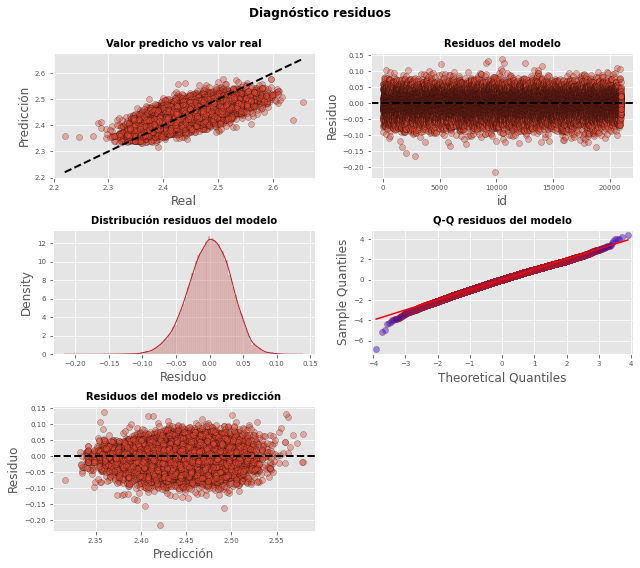

In [8]:
# División de los datos en train y test
# ==============================================================================
X = dataframe_filtered[['BathAndRooms','Rooms', 'Bathroom', 'Distance','Landsize','Longtitude']]
y = dataframe_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
'''datos_train = pd.DataFrame(
                     np.hstack((X_train, y_train)),
                     columns=['Rooms', 'Bathroom', 'Distance', 'Price']
               )
modelo = smf.ols(formula = 'Price ~ BathAndRooms', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())
'''

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci




# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");